In [1]:
import torch
weight = 0.7
bias = 0.3

#create
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)

y =weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

# New Section

In [2]:
#spliting data in training and test
train_split = int(0.8 * len(X))
train_split
X_train,y_train = X[:train_split], y[:train_split] #This line is performing a slicing operation to split the data into training sets
X_test,y_test = X[train_split:],y[train_split:]

len(X_train),len(y_train),len(X_test),len(y_test) # (40, 40, 10, 40)
# len(X_train) training features, len(y_train) training labels
#len(X_test) testing features,len(y_test) testing labels

(40, 40, 10, 10)

In [3]:
import matplotlib.pyplot as plt
def plot_predictions(train_data = X_train, train_labels = y_train, test_data = X_test, test_labels=y_test, predictions=None):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data,train_labels, c="b", s= 4, label = "training data")
    plt.scatter(test_data,test_labels, c="g", s= 4, label = "Test data")
    plt.legend(prop={"size":14})
    if predictions is not None:
        plt.scatter(test_data,predictions, c="r", s= 4, label = "Predictions")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

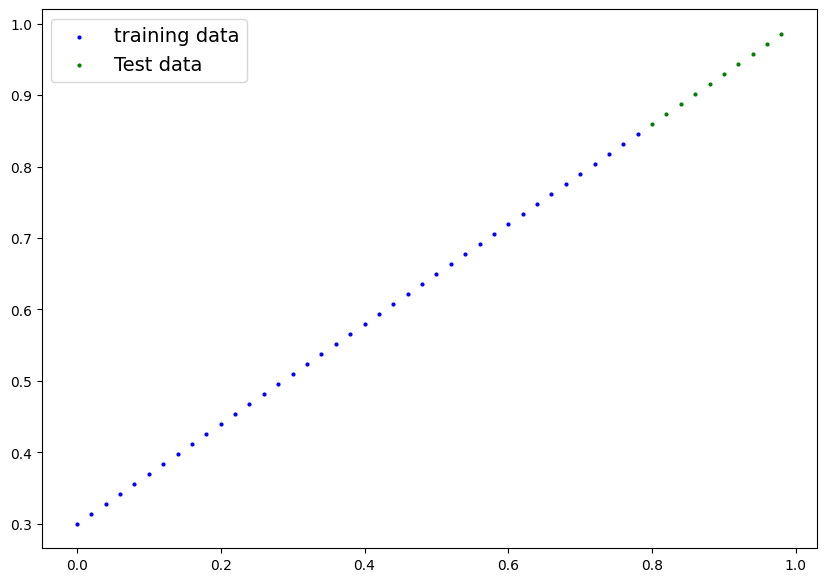

In [4]:
plot_predictions();

In [5]:
class LinearRegressionModel(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = torch.nn.Parameter(torch.randn(1, # start with a random weight a dn try to adjust it to the ideal weight
                                                  requires_grad=True, #can this parameter be updated by gradient descent?
                                                  dtype=torch.float)) #pytorch use float32 by deault
    self.bias = torch.nn.Parameter(torch.randn(1, # start with a random bias a dn try to adjust it to the ideal weight
                                               requires_grad=True,  #can this parameter be updated by gradient descent?
                                               dtype=torch.float))
#forward method to define the coputation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: #x is input data
    return self.weights * x + self.bias # linear regression formula



In [6]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]
** #understanding output**
 Parameter containing: tensor([0.5110], requires_grad=True): This represents the weight of the model, initialized with the value 0.5110. The requires_grad=True means this parameter will be updated during training.
Parameter containing: tensor([-0.3667], requires_grad=True): This represents the bias of the model, initialized with the value -0.3667. Similarly, it will be updated during training

In [7]:
#list name parameters. it is a state dic used to maintan the state of model parametes
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
 weight,bias


(0.7, 0.3)

In [8]:
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds


tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

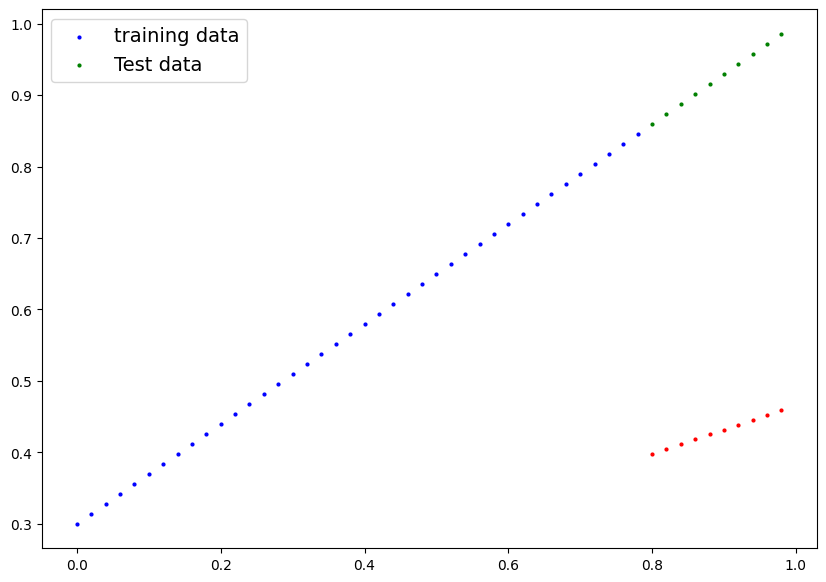

In [9]:
plot_predictions(predictions=y_preds)